<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 5
## Síntesis de filtro pasa-banda
### Gaston Barthou y Jorge Andres Niño


A partir de la plantilla presentada para un filtro pasa-pasabanda, obtener la respuesta en frecuencia y la fase, el diagrama de polos y ceros y el retardo, empleando la transformación en frecuencia, sintetizar el circuito mediante estructuras pasivas y empleando estructura bicuadratica.

![*Figura 1*](TS5_Problema.png)

## Síntesis de la función transferencia y circuito normalizado.

Se presenta la síntesis de la función transferencia calculada mediante un prototipo pasa-bajos, a partir del cual se calcula la función transferencia según polinomio de chebyschev y luego aplicando el núcleo de transformación se llega a las funciones SOS para sintetizar el circuito.

In [3]:
from IPython.display import IFrame, display
IFrame("./TS5_res.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica

In [1]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_bicuad_omegayq, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt


<IPython.core.display.Math object>

<IPython.core.display.Math object>

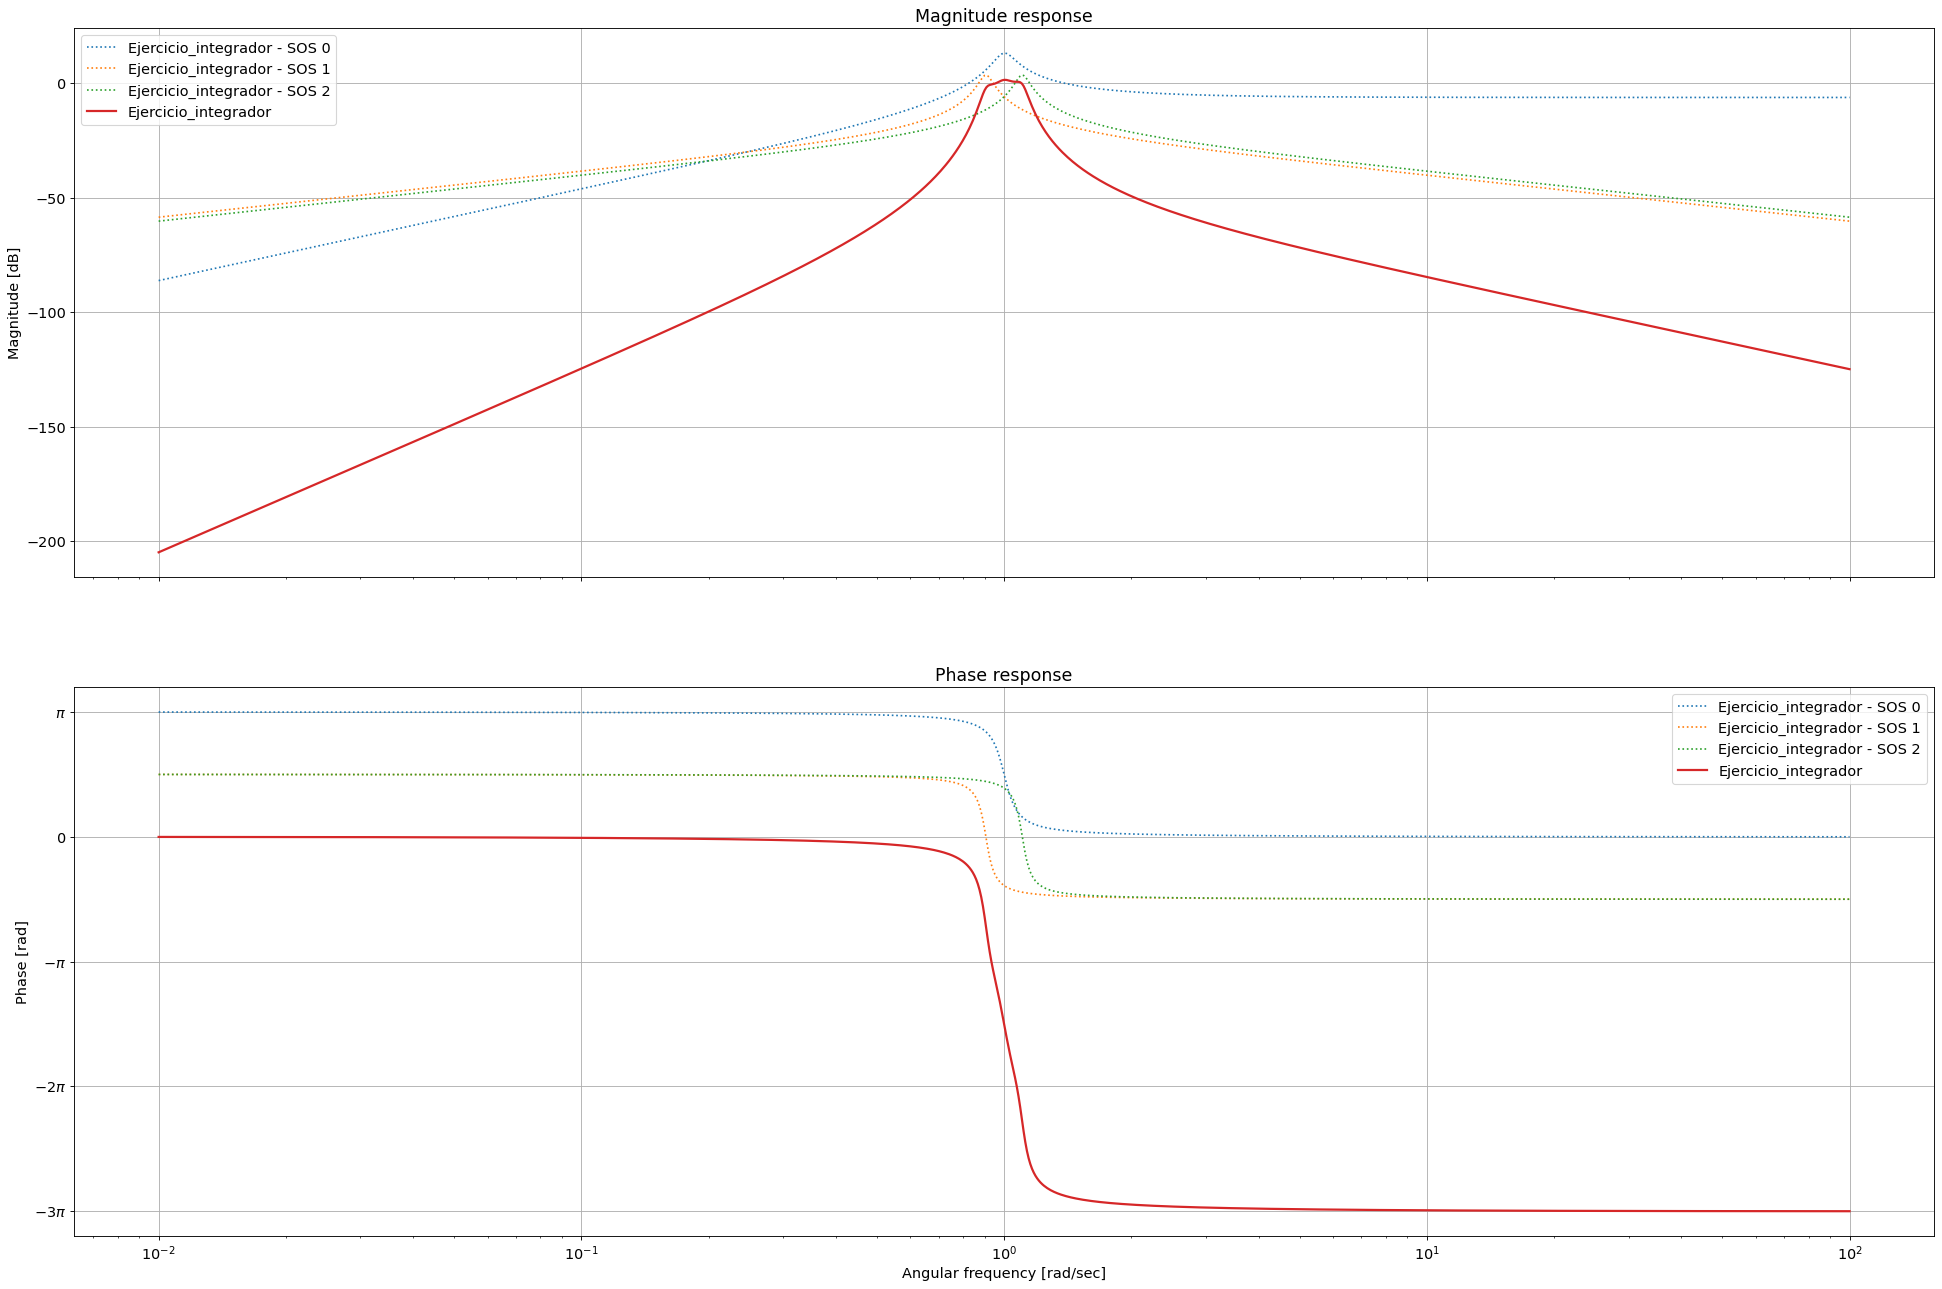

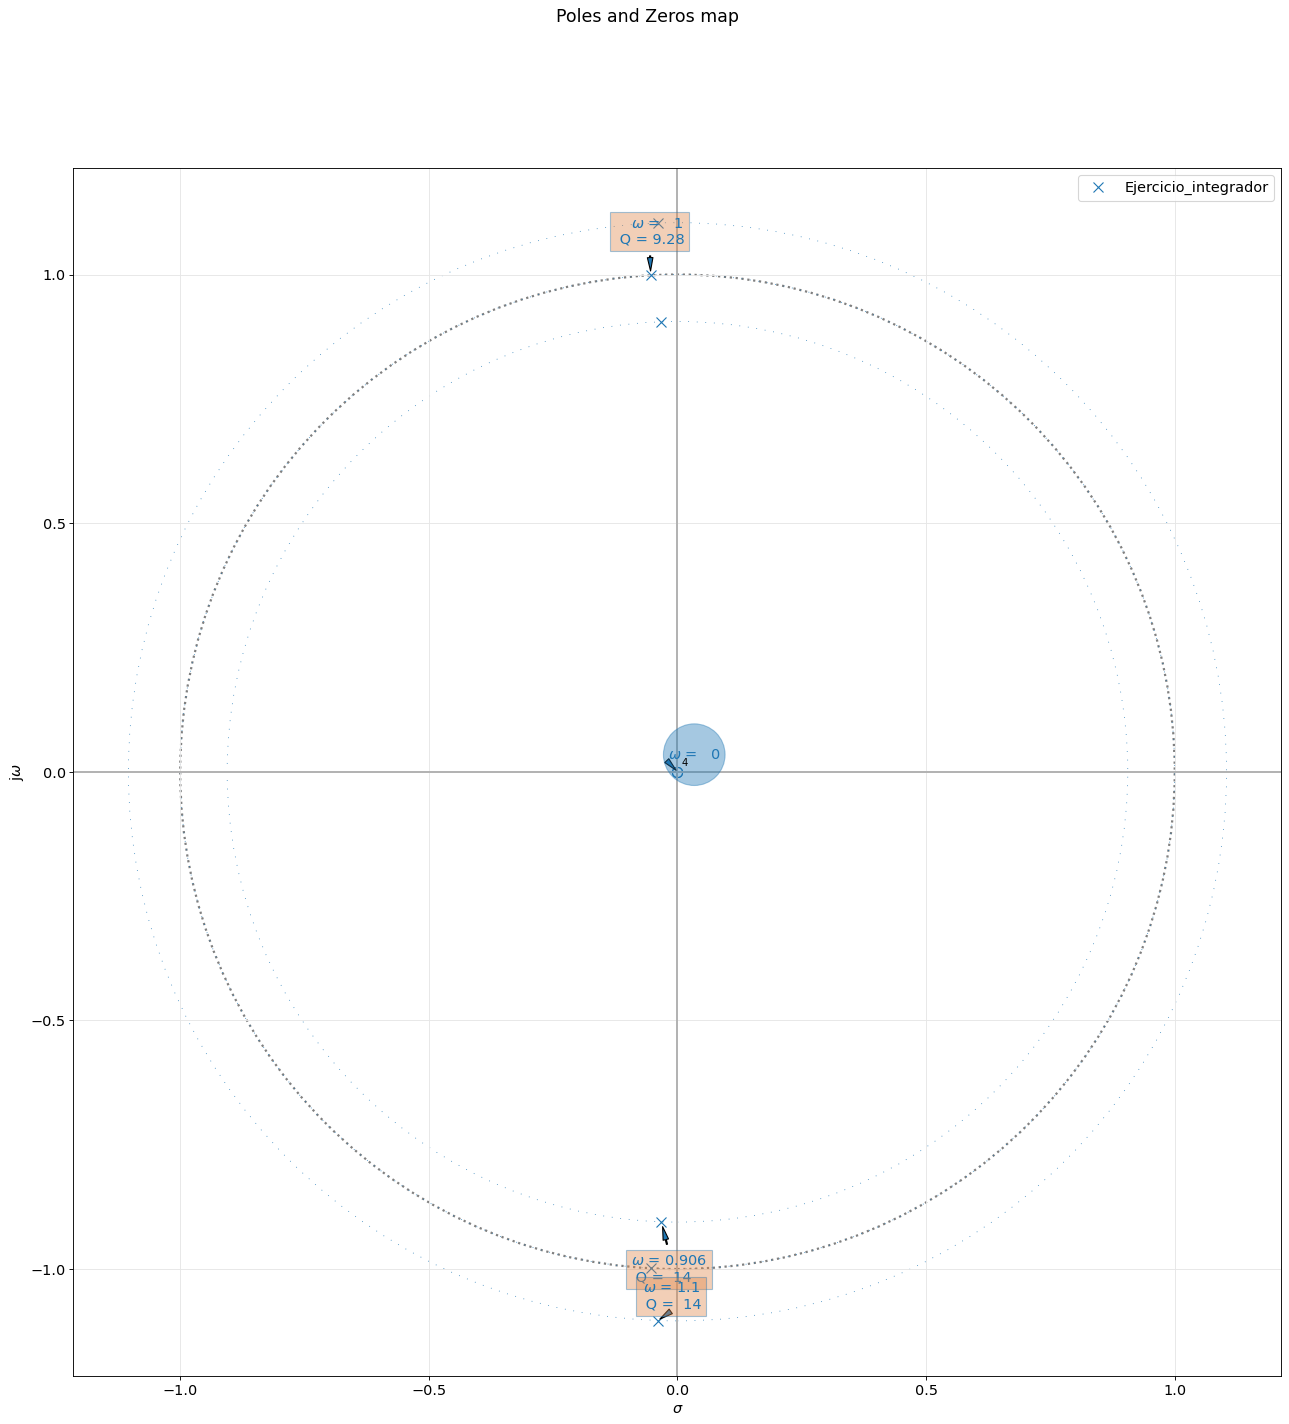

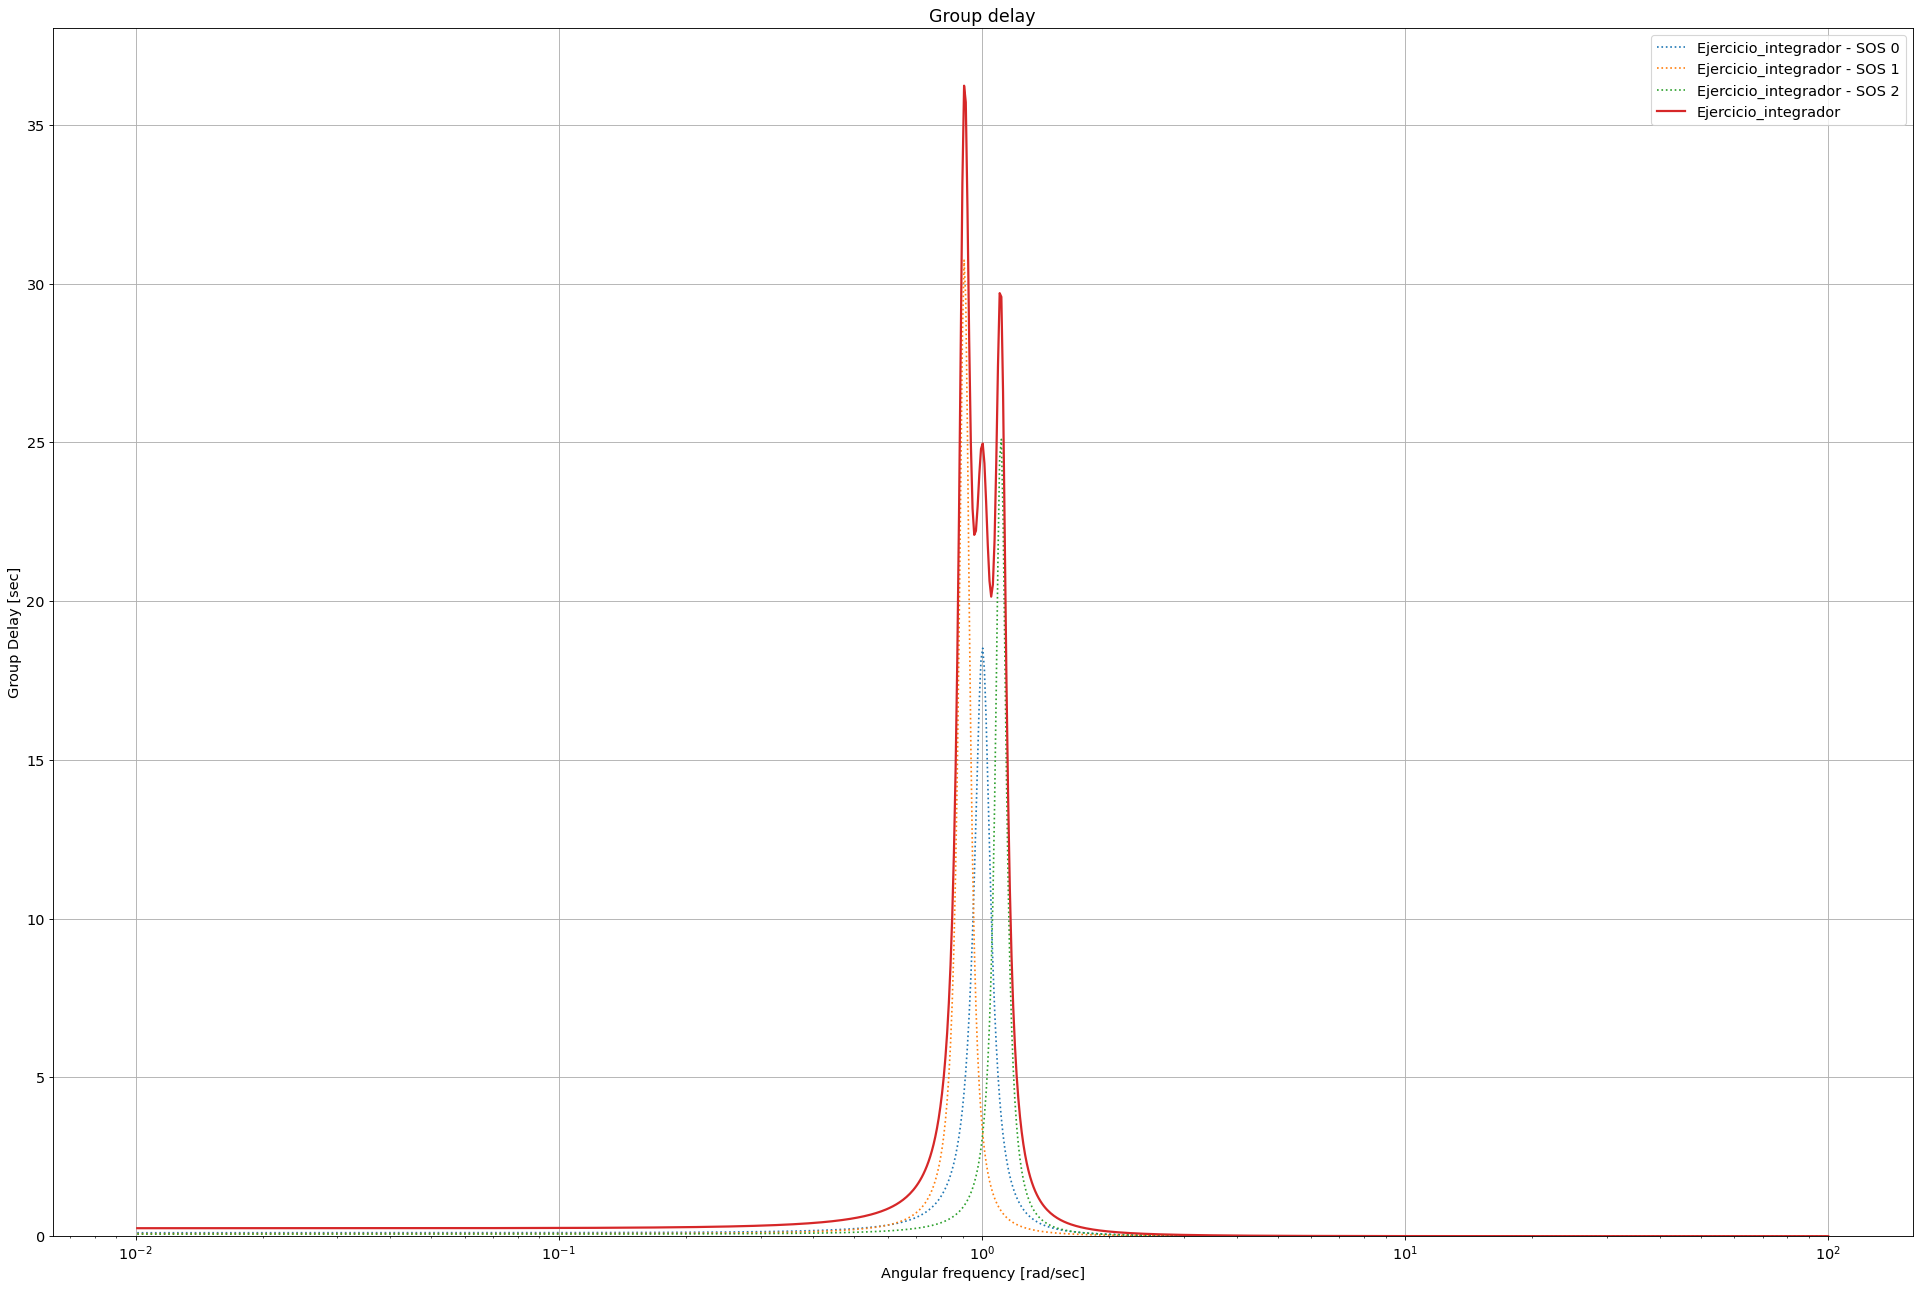

In [4]:
#%% Funcion trasnferencia:
w0 = 1
wn = 1/3
num1= np.array([0.0057*w0**3,0,0,0])
den1 = np.array([w0**6,0.2511*w0**5,3.060*w0**4, 0.507*w0**3, 3.060*w0**2, 0.2511*w0,1])
H1 = Funcion.TransferFunction( num1, den1 )
pretty_print_lti(num1, den1)
fig_sz_x = 30
fig_sz_y = 20
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# particiono en SOS's para la implementación
sos_hp = tf2sos_analog(num1, den1)
pretty_print_SOS(sos_hp)
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
analyze_sys(sos_hp, 'Ejercicio_integrador')

Simulamos el sistema con los valores calculados en el apartado del PDF, y luego aplicamos la trasnformación en frecuencia y en impedancia para obtener las respuestas deseadas en LTSPICE:

![*Figura 6*](circ_ampli.png)

![*Figura 7*](SIM_FC_0DB.png)

![*Figura 7*](SIM_FS_0DB.png)

En la figura de la respuesta en frecuencia podemos observar que el primer cursor nos señala $-0.8 db$ a $19.8 KHz$ y a $24.3 KHz$ con lo cual cumplimos con las frecuencias de corte. Luego en $f= 17KHz$, obtenemos $27 db$ de atenuación, cumpliendo con esta parte de la plantilla, ya que en la $f_{CS}$ tenemos mucha mas atenuación de la requerida.

## Implementación Bicuadratica

A contiuación implementamos las funciones SOS con el circuito propuesto:

![*Figura 8*](BICUAD.png)

In [6]:
from IPython.display import IFrame, display
IFrame("./TS5_gic.pdf", width=1000, height=1000)

De la deducción arriba mencionada se extraen los valores de $Rb, Rc, R, C$ para cada sección SOS de acuerdo a los valores obtenidos en las funciones SOS matematicas:   $$R_i=\frac{1}{2\pi*f_0*C_i*\sqrt{\omega_i}}$$  
$$Rb_i = \frac{Q*R}{b}$$  
$$Rc_i = \frac{Q*R}{(1-b)}$$ 
$$2b = K_{numerador}$$
de lo cual:
$$Q1=7.96, Q2=14.5, Q3=17.7$$
 $$f_0=22000 Hz, C_i=100nF, Zn=\frac{1}{2\pi*f_0*C_i}, Rb1=31.92, Rb2=23.6, Rb3=19.3$$

A continuación presentamos el circuito parametrizado:

![*Figura 8*](GIC_CIR_1.png)

La respuesta de las simulaciones fue la siguiente:

![*Figura 8*](GIC_SIM_1.png)

![*Figura 8*](GIC_CIR_2.png)

Como podemos observar cumple los parametros tanto en Banda de Paso como en Banda de Stop, con asimetría en cada una de las ramas

# Conclusiones:
 

* Se pudo obtener la función transferencia de un filtro pasa-banda a partir del uso de nucleo de transformación y de plantilla prototipo pasa-bajos, que en la simulación matemática ajusta a la plantilla obtenida. Se observa que debido a la naturaleza del nucleo de transformación y la asimetría de cada banda, el diseño estara sobredimensionado en una de las bandas y ajustado según la banda mas exigente.
* La implementación mediante circuitos pasivos para altos Q genera algunos inconvenientes, según los modelos empleados en el simulador. Sin embargo se pudo llegar a una simulación adecuada que cumple con las caracteristicas pedidas.
* La implementacion mediante bicuadratica del GIC para pasabanda, permite evitar los componentes inductivos y parametrizar las ganancias y el Q de cada etapa SOS mediante el ajuste de dos resistores, y la frecuencia según los valores R y C del circuito. 